## Importing Libraries

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# For some basic operations
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for animated visualizations
#from bubbly.bubbly import bubbleplot
import plotly_express as px


# for interactive visualization
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# for modelling
from sklearn.model_selection import train_test_split

# for model explanation
import shap 
import eli5

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospital-data/Final_Clean_Dataset.csv


## Reading the Dataset

In [4]:
# load data 

data = pd.read_csv('/kaggle/input/hospital-data/Final_Clean_Dataset.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)

data.head()

,hospital_id,case_linked,case_type,total_open_invoices_before_appointemnt,total_good_appointments_before_appointment,total_cxl_appointments_before_appointment,patient_status,patient_type,time_of_day,month_period,day_of_week,month_of_year,day_of_month,week_of_year,appointment_status,next_appointment_time,notice,cancelled_at,appointment_type,billable_item,category,cancelled,missed,appointment_start_time,business_name,customer_type,title,state,date_of_birth,sex,city,occupation,referred
0,11,No,Not Available,0,0,0,Not Yet Actioned,New To Clinic,Early Morning,Mid month,Friday,July,17.0,29.0,Not Rebooked,NaN,12.73,2020-07-16 08:36:13+00,✅20 Minute Follow Up Consult,PhysioCall - 20 Minute Follow Up Consult (Pre-...,A | Pre Pay Online & Save ✅,Yes,No,2020-07-16 21:20:00+00,PhysioCall Gladstone,Staff,Mr,QLD,1984-02-03,Male,South Gladstone,Physio,Yes
1,11,No,Not Available,0,0,0,Not Yet Actioned,Recurring,Late Afternoon,Mid month,Thursday,August,13.0,33.0,Not Rebooked,NaN,0.00,NaN,✅20 Minute Follow Up Consult,PhysioCall - 20 Minute Follow Up Consult (Pre-...,A | Pre Pay Online & Save ✅,No,No,2020-08-13 06:00:00+00,PhysioCall Gladstone,No Type,Mrs,VIC,1997-01-30,Female,Clontarf,No Occupation,No
2,11,No,Not Available,0,1,0,Not Yet Actioned,Recurring,Late Morning,Mid month,Thursday,August,20.0,34.0,Not Rebooked,NaN,0.00,NaN,✅20 Minute Follow Up Consult,PhysioCall - 20 Minute Follow Up Consult (Pre-...,A | Pre Pay Online & Save ✅,No,No,2020-08-20 01:20:00+00,PhysioCall Gladstone,No Type,Mr,VIC,1997-01-30,Female,GLADSTONE,No Occupation,No
3,11,No,Not Available,0,2,0,Not Yet Actioned,Recurring,Late Morning,Mid month,Friday,September,18.0,38.0,Not Rebooked,NaN,0.00,NaN,✅20 Minute Follow Up Consult,PhysioCall - 20 Minute Follow Up Consult (Pre-...,A | Pre Pay Online & Save ✅,No,No,2020-09-17 23:50:00+00,PhysioCall Gladstone,No Type,Ms,QLD,1997-01-30,Female,Clontarf,No Occupation,No
4,11,No,Not Available,0,0,0,Not Yet Actioned,New To Clinic,Early Morning,End month,Monday,September,21.0,39.0,Not Rebooked,NaN,0.00,NaN,✅20 Minute Follow Up Consult,PhysioCall - 20 Minute Follow Up Consult (Pre-...,A | Pre Pay Online & Save ✅,No,No,2020-09-20 22:20:00+00,PhysioCall Gladstone,No Type,Mr,VIC,1980-02-03,Female,Scarborough,No Occupation,No


In [5]:
# let's check the shape of the dataset

data.shape

(142588, 33)

In [6]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142588 entries, 0 to 142587
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hospital_id                                 142588 non-null  int64  
 1   case_linked                                 142588 non-null  object 
 2   case_type                                   142588 non-null  object 
 3   total_open_invoices_before_appointemnt      142588 non-null  int64  
 4   total_good_appointments_before_appointment  142588 non-null  int64  
 5   total_cxl_appointments_before_appointment   142588 non-null  int64  
 6   patient_status                              142588 non-null  object 
 7   patient_type                                142588 non-null  object 
 8   time_of_day                                 142588 non-null  object 
 9   month_period                                142588 non-null  object 
 

## Descriptive Statistics

In [7]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, 
# etc values for the Numerical features present in the data.

data.describe()

,hospital_id,total_open_invoices_before_appointemnt,total_good_appointments_before_appointment,total_cxl_appointments_before_appointment,day_of_month,week_of_year,notice
count,142588.000000,142588.000000,142588.000000,142588.000000,142588.000000,142588.000000,142588.000000
mean,13.531125,0.158443,10.589180,2.634492,15.621876,24.938543,-841.518925
std,1.839764,0.899404,23.449078,8.671736,8.630196,14.939448,4682.975918
min,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-65869.140000
25%,12.000000,0.000000,1.000000,0.000000,8.000000,12.000000,0.000000
50%,13.000000,0.000000,3.000000,0.000000,16.000000,23.000000,0.000000
75%,16.000000,0.000000,10.000000,2.000000,23.000000,38.000000,0.000000
max,16.000000,36.000000,334.000000,145.000000,31.000000,53.000000,17186.200000



### Description of Columns in the dataset
* case_linked = "This is the package plan status, that either patient plan is active or not."
* total_closed_invoices_before_appt = "How many invoices patient has paid before this appointment."
* total_good_appointments_before_cancelled_appt = "How many good appointments patient has taken before this cancelled appointment."
* total_cancel_appt_before_cancelled_appt = "How many appointments patient has cancelled before this cancelled appointment."
* patient_status = "What is the status of patient. Either his followup is going on or treatment has been ended."
* patient_type = "This is the type of patient, either he is old patient or new patient, or first time came to clinic."
* notice = "How many hours before appointment he has cancelled the booking."
* case_type = "What type of package is this. Either unlimited appointments or limited appointments."
* cancelled_at = "Date and time of appointment cancelation. Kis date pa cancel hui ha appointment."
* appointement_type = "With whom the appointment was. With physiotherapist, or nutritionist."
* billable_item = ""
* appointemnt_start_time = "What was the date time of appointment?"
* Business_name = "Which department he has visited. Check that."
* customer_type = "What type of discount he has availed. Either he has availed any discount or not."

In [8]:
# lets check the correlation
data.corr(numeric_only=True)

,hospital_id,total_open_invoices_before_appointemnt,total_good_appointments_before_appointment,total_cxl_appointments_before_appointment,day_of_month,week_of_year,notice
hospital_id,1.000000,-0.031797,-0.193105,-0.158136,0.003761,-0.014641,0.049929
total_open_invoices_before_appointemnt,-0.031797,1.000000,0.178250,0.178631,0.004450,-0.002288,0.024855
total_good_appointments_before_appointment,-0.193105,0.178250,1.000000,0.601597,-0.001243,0.020934,-0.002363
total_cxl_appointments_before_appointment,-0.158136,0.178631,0.601597,1.000000,-0.002726,0.028406,-0.158617
day_of_month,0.003761,0.004450,-0.001243,-0.002726,1.000000,0.047071,-0.000390
week_of_year,-0.014641,-0.002288,0.020934,0.028406,0.047071,1.000000,-0.036635
notice,0.049929,0.024855,-0.002363,-0.158617,-0.000390,-0.036635,1.000000


In [9]:
# lets check the covriance
data.cov(numeric_only=True)

,hospital_id,total_open_invoices_before_appointemnt,total_good_appointments_before_appointment,total_cxl_appointments_before_appointment,day_of_month,week_of_year,notice
hospital_id,3.384733,-0.052615,-8.330681,-2.522897,0.059712,-0.402398,4.301689e+02
total_open_invoices_before_appointemnt,-0.052615,0.808927,3.759321,1.393216,0.034544,-0.030743,1.046868e+02
total_good_appointments_before_appointment,-8.330681,3.759321,549.859237,122.331168,-0.251599,7.333586,-2.594626e+02
total_cxl_appointments_before_appointment,-2.522897,1.393216,122.331168,75.199000,-0.204000,3.679971,-6.441355e+03
day_of_month,0.059712,0.034544,-0.251599,-0.204000,74.480290,6.068909,-1.576870e+01
week_of_year,-0.402398,-0.030743,7.333586,3.679971,6.068909,223.187096,-2.563022e+03
notice,430.168949,104.686815,-259.462622,-6441.355025,-15.768697,-2563.021537,2.193026e+07


## Data Cleaning

In [10]:
# First of let's removed unwanted columns
# let's check whether the data has any null values or not.

data.isnull().any()

hospital_id                                   False
case_linked                                   False
case_type                                     False
total_open_invoices_before_appointemnt        False
total_good_appointments_before_appointment    False
total_cxl_appointments_before_appointment     False
patient_status                                False
patient_type                                  False
time_of_day                                   False
month_period                                  False
day_of_week                                   False
month_of_year                                 False
day_of_month                                  False
week_of_year                                  False
appointment_status                            False
next_appointment_time                          True
notice                                        False
cancelled_at                                   True
appointment_type                              False
billable_ite

In [11]:
columns_with_missing_values = ['next_appointment_time', 'cancelled_at']


print("num of next_appointment_time with null values: \n", \
      len(data['next_appointment_time'].isna() == True))
print("num of cancelled_at with null values: \n", \
      len(data['cancelled_at'].isna()  == True))

num of next_appointment_time with null values: 
 142588
num of cancelled_at with null values: 
 142588


In [12]:
# missing value treatment using fillna

# It may be the case that there are no next appointment date set yet then we might take it as blank.
data['next_appointment_time'] = data['next_appointment_time'].fillna('')

# again, if there are no responses cancelled at available then we might take it as blank
data['cancelled_at'] = data['cancelled_at'].fillna('')

data.isnull().any().any()

False

## Data Visualization

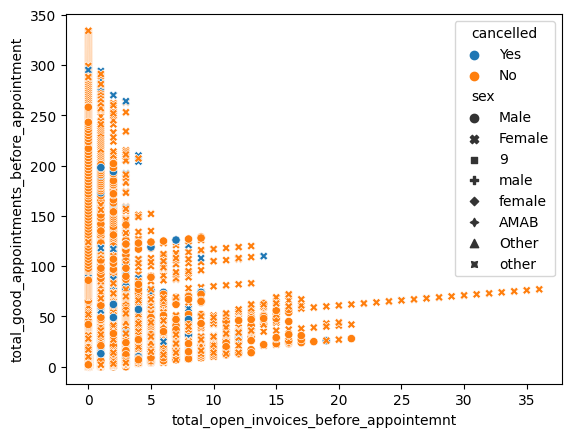

In [13]:
sns.scatterplot(x = 'total_open_invoices_before_appointemnt', y = 'total_good_appointments_before_appointment', data=data, hue='cancelled', style='sex')
plt.show()

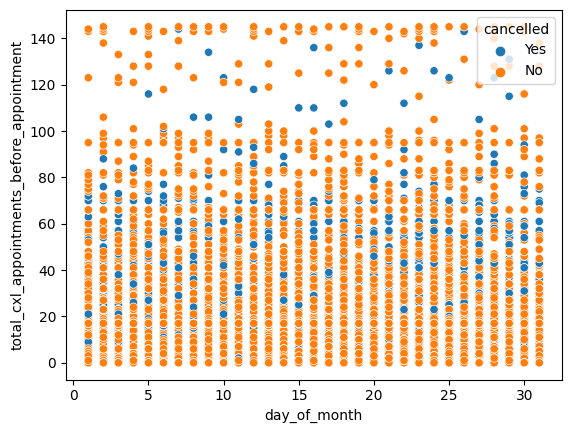

In [14]:
sns.scatterplot(x = 'day_of_month', y = 'total_cxl_appointments_before_appointment', data=data, hue='cancelled')
plt.show()

In [15]:
cancelled = data['cancelled'].value_counts()

label_cancelled = cancelled.index
size_cancelled = cancelled.values

colors = ['silver', 'gold']
trace = go.Pie(
         labels = label_cancelled, values = size_cancelled, marker = dict(colors = colors), name = 'Cancelled', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Canclled Appointments')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

Passing `palette` without assigning `hue` is deprecated.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


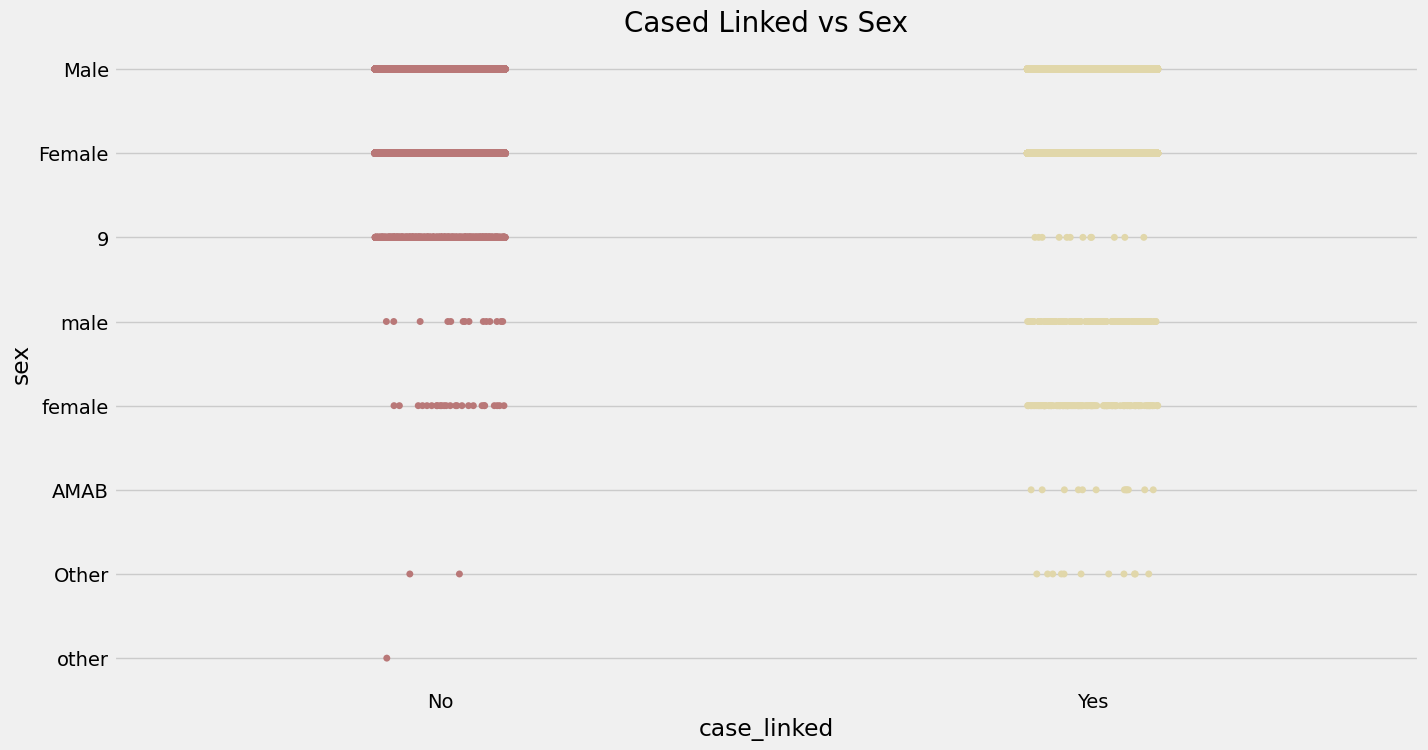

In [17]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(x=data['case_linked'], y=data['sex'], palette = 'pink')
plt.title('Cased Linked vs Sex', fontsize = 20)
plt.show()

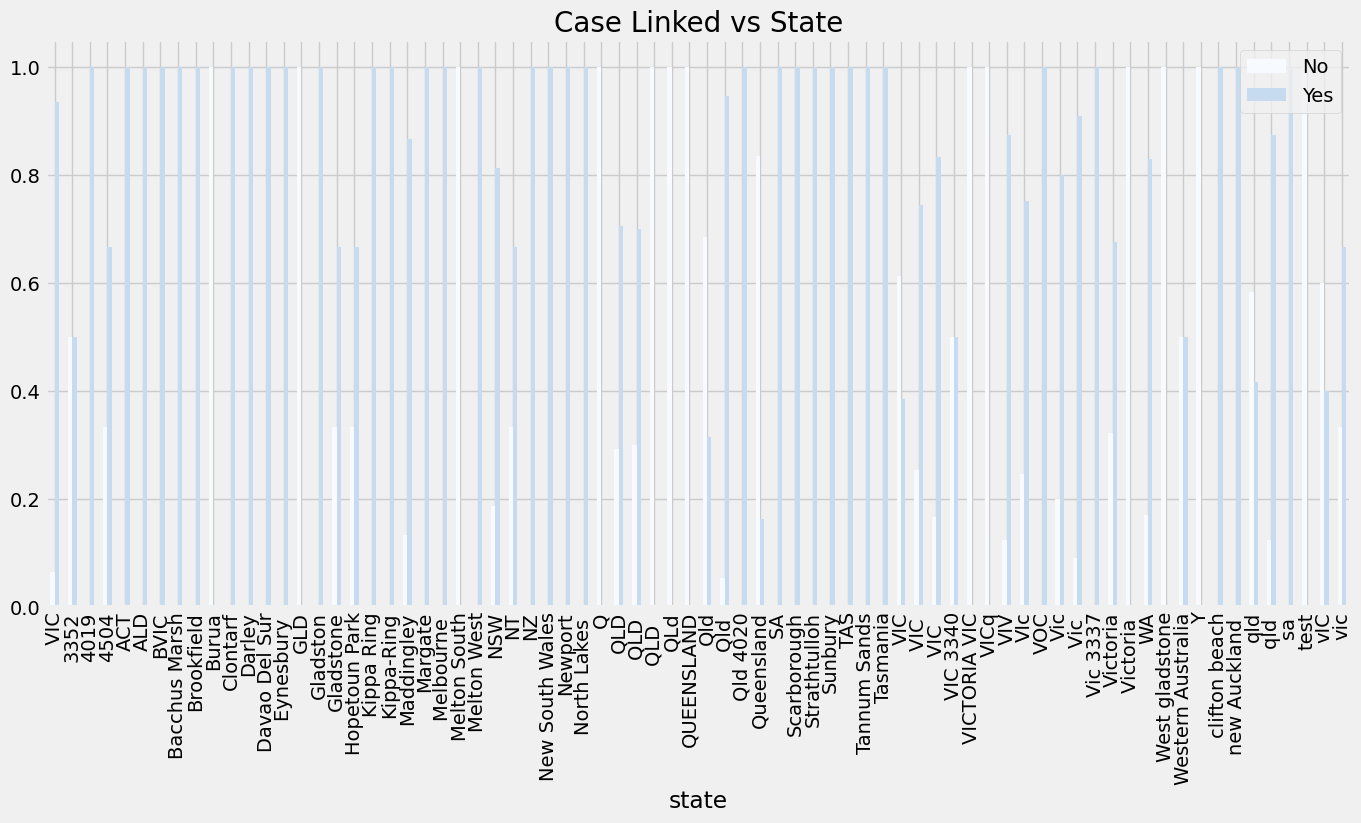

In [18]:
incident = pd.crosstab(data['state'], data['case_linked'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Case Linked vs State', fontsize = 20)
plt.legend()
plt.show()

## Data Processing

In [19]:
# let extract days, month and year from date of birth
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')
data['date_of_birth'].head()

0   1984-02-03
1   1997-01-30
2   1997-01-30
3   1997-01-30
4   1980-02-03
Name: date_of_birth, dtype: datetime64[ns]

In [20]:
# let's extrat days, month and year from appointment start time

data['appointment_start_time'] = pd.to_datetime(data['appointment_start_time'], errors = 'coerce')
data['appointment_start_time'].head()

0   2020-07-16 21:20:00+00:00
1   2020-08-13 06:00:00+00:00
2   2020-08-20 01:20:00+00:00
3   2020-09-17 23:50:00+00:00
4   2020-09-20 22:20:00+00:00
Name: appointment_start_time, dtype: datetime64[ns, UTC]

In [21]:
# lets calculate their age on their appointment date using the date of birth and their appointment date

def age(dob, appointment_date):
    return appointment_date.year - dob.year - ((appointment_date.month, appointment_date.day) < (dob.month, dob.day))

data['age'] = [age(d[0], d[1]) for d in data[['date_of_birth', 'appointment_start_time']].values]
data['age'].head()

0    36.0
1    23.0
2    23.0
3    23.0
4    40.0
Name: age, dtype: float64

In [22]:
# let's encode the cancelled to numerical values

data['cancelled'] = data['cancelled'].replace(('Yes','No'),(1,0))

# checking the values of cancelled
data['cancelled'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


cancelled
0    119696
1     22892
Name: count, dtype: int64

In [24]:
# Combine all sex categoris into three; female, male, and other
data['sex'] = data['sex'].replace(('female', 'male', 'other', '9', 'AMAB'), ('Female', 'Male', 'Other', 'Other', 'Other'))#
data['sex'].value_counts()

sex
Female    81578
Male      59579
Other      1431
Name: count, dtype: int64

In [26]:
# ENCODE THE SEX using norminal encoding
data['sex'] = data['sex'].replace(('Female','Male', 'Other'),(2, 1, 0))

# lets check the values
data['sex'].value_counts()

sex
2    81578
1    59579
0     1431
Name: count, dtype: int64

In [27]:
# let's check the correlation of patient_status with the target

data[['patient_status','cancelled']].groupby(['patient_status'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)


# let's perform target encoding for patient status
data['patient_status'] = data['patient_status'].replace(('Do Not Contact', 'Has An Upcoming Booking', 'Therapist Follow Up',
                                                         'Patient Stopped Treatment', 'Admin Follow Up', 'Not Yet Actioned', 'On Waiting List',
                                                         'Discharged By Therapist', 'Contacted Too Many Times', 'Staff & Family'),
                (0.321429, 0.190780, 0.176758, 0.171192, 0.168235, 0.159151, 0.130435, 0.122159, 0.111111, 0.071429))

# let's check the values
data['patient_status'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


patient_status
0.159151    129550
0.176758      7366
0.190780      2191
0.171192      1694
0.168235       850
0.122159       352
0.130435       322
0.071429       126
0.111111        81
0.321429        56
Name: count, dtype: int64

In [28]:
# let's check the correlation of patient_type with the target

data[['patient_type','cancelled']].groupby(['patient_type'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for patient status
data['patient_type'] = data['patient_type'].replace(('New To Clinic', 'new to service', 'new to therapist', 'Recurring', 'new injury/issue'),
                (0.456233, 0.347072, 0.245138, 0.145404, 0.123552))

# let's check the values
data['patient_type'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


patient_type
0.145404    119797
0.123552     12173
0.456233      6249
0.245138      3908
0.347072       461
Name: count, dtype: int64

In [29]:
# let's check the correlation of state with the target

data[['state','cancelled']].groupby(['state'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for patient status
data['state'] = data['state'].replace(('Davao Del Sur', 'Melton South', 'GLD', 'Hopetoun Park', 'Y',
       '4019', 'Western Australia', 'Melton West', 'West gladstone',
       'Gladstone', 'North Lakes ', 'Q', 'Qld 4020', '4504', 'Margate',
       'Qld ', '3352', 'Melbourne ', 'vic', 'VIC 3340', 'VIV',
       'Victoria ', 'Queensland', 'NSW', 'QLD ', 'vIC', 'qld', 'WA', 'NT',
       'QLD', 'Qld', 'Victoria', 'VIC', 'VIC ', 'Newport', 'Maddingley',
       'qld ', 'ALD', 'Clontarf', 'SA', 'Scarborough', 'TAS', 'Vic',
       'QLd', 'Vic ', 'VIc', ' VIC', 'Tasmania', 'QUEENSLAND', 'ACT',
       'test', 'sa ', 'NZ', 'QLD  ', 'new Auckland ', 'clifton beach',
       'BVIC', 'Bacchus Marsh', 'Brookfield', 'Burua', 'Kippa-Ring',
       'Tannum Sands', 'Vic 3337', 'Kippa Ring', 'Gladston', 'VOC',
       'Strathtulloh', 'Darley', 'VICq', 'New South Wales', 'Eynesbury ',
       'VIC  ', 'Sunbury', 'VICTORIA VIC'),
                (1.        , 1.        , 0.7       , 0.66666667, 0.6       ,
       0.5       , 0.5       , 0.4       , 0.36666667, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.28571429,
       0.27027027, 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.24535604, 0.21783439, 0.20948617,
       0.2       , 0.19047619, 0.17021277, 0.16666667, 0.16489092,
       0.16322604, 0.15151515, 0.14247639, 0.1372549 , 0.13636364,
       0.13333333, 0.125     , 0.125     , 0.11111111, 0.11111111,
       0.11111111, 0.1       , 0.09855769, 0.09090909, 0.09090909,
       0.06896552, 0.02150538, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ))

# let's check the values
data['state'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


state
0.164891    82970
0.142476    30391
0.163226    24947
0.245356     1292
0.098558      832
0.217834      785
0.209486      253
0.068966      174
0.366667      150
0.000000      111
0.151515       99
0.021505       93
0.190476       84
0.250000       60
0.137255       51
0.170213       47
0.090909       44
0.270270       37
0.111111       36
0.136364       22
0.333333       18
0.125000       16
0.133333       15
0.700000       10
0.100000       10
0.500000        8
0.285714        7
0.166667        6
0.200000        5
0.600000        5
0.400000        5
0.666667        3
1.000000        2
Name: count, dtype: int64

In [30]:
# let's check the correlation of occupation with the target

d=data[['occupation','cancelled']].groupby(['occupation'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

tuple(d['occupation'].values), tuple(d['cancelled'].values)

# let's perform target encoding for patient status
data['occupation'] = data['occupation'].replace(tuple(d['occupation'].values),tuple(d['cancelled'].values))

# let's check the values
data['occupation'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


occupation
0.190330    68108
0.131468    11364
0.000000     6339
0.130862     4990
0.136258     2576
            ...  
0.700000       10
0.555556        9
0.571429        7
0.833333        6
0.800000        5
Name: count, Length: 339, dtype: int64

In [31]:
# lets encode the referred column using norminal encoding
data['referred'] = data['referred'].replace(('Yes', 'No'), (1, 0))

data['referred'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


referred
0    97591
1    44997
Name: count, dtype: int64

In [32]:
# let's check the correlation of business_name with the target

d=data[['business_name','cancelled']].groupby(['business_name'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for business_name
data['business_name'] = data['business_name'].replace(tuple(d['business_name'].values),tuple(d['cancelled'].values))

# let's check the values
data['business_name'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


business_name
0.167572    32219
0.281527    29681
0.066768    26974
0.073245    17735
0.199153     8732
0.087652     6252
0.185121     5753
0.164758     5153
0.204184     4207
0.124378     1407
0.000000     1149
0.209549      754
0.371560      654
0.212500      640
0.131931      523
0.229314      423
0.053254      169
0.579310      145
0.181818       11
0.400000        5
1.000000        2
Name: count, dtype: int64

In [33]:
# let's check the correlation of category with the target

d=data[['category','cancelled']].groupby(['category'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for category
data['category'] = data['category'].replace(tuple(d['category'].values),tuple(d['cancelled'].values))

# let's check the values
data['category'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


category
0.103872    42591
0.213210    26162
0.247737    10604
0.220329     8451
0.211685     5905
            ...  
0.222222        9
0.500000        8
0.125000        8
0.428571        7
0.400000        5
Name: count, Length: 114, dtype: int64

In [34]:
# let's check the correlation of billable_item with the target

d=data[['billable_item','cancelled']].groupby(['billable_item'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for billable_item
data['billable_item'] = data['billable_item'].replace(tuple(d['billable_item'].values),tuple(d['cancelled'].values))

# let's check the values
data['billable_item'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


billable_item
0.024423    18098
0.115676    14921
0.211393    13359
0.368871    11237
0.108755     5848
            ...  
0.444444        9
0.222222        9
0.875000        8
0.600000        5
0.400000        5
Name: count, Length: 208, dtype: int64

In [35]:
# let's check the correlation of case_linked with the target

d=data[['case_linked','cancelled']].groupby(['case_linked'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for case_linked
data['case_linked'] = data['case_linked'].replace(tuple(d['case_linked'].values),tuple(d['cancelled'].values))

# let's check the values
data['case_linked'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


case_linked
0.127085    80639
0.204103    61949
Name: count, dtype: int64

In [36]:
# let's check the correlation of case_type with the target

d=data[['case_type','cancelled']].groupby(['case_type'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for case_type
data['case_type'] = data['case_type'].replace(tuple(d['case_type'].values),tuple(d['cancelled'].values))

# let's check the values
data['case_type'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


case_type
0.204103    61949
0.139385    59368
0.092739    21167
0.096154      104
Name: count, dtype: int64

In [37]:
# let's check the correlation of appointment_type with the target

d=data[['appointment_type','cancelled']].groupby(['appointment_type'], 
                as_index = False).mean().sort_values(by = 'cancelled', ascending = False)

# let's perform target encoding for appointment_type
data['appointment_type'] = data['appointment_type'].replace(tuple(d['appointment_type'].values),tuple(d['cancelled'].values))

# let's check the values
data['appointment_type'].value_counts()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


appointment_type
0.018429    16876
0.116533    13627
0.215929    12430
0.387634    10448
0.108347     5427
            ...  
0.600000       10
0.800000       10
0.875000        8
0.833333        6
0.400000        5
Name: count, Length: 239, dtype: int64

In [38]:
# lets create new column for day week and year of appointment time
data['appointment_start_time_day'] = data['appointment_start_time'].dt.day
data['appointment_start_time_week'] = data['appointment_start_time'].dt.month
data['appointment_start_time_year'] = data['appointment_start_time'].dt.year
data['appointment_start_time_hour'] = data['appointment_start_time'].dt.time.apply(lambda t: t.hour)

In [39]:
# lets drop null rows
data = data.dropna()
# reindex the data
idxs = list(range(len(data)))
data.index = idxs

In [40]:
# let's delete unnecassary columns

data = data.drop(['hospital_id','title', 'date_of_birth', 'city', 'appointment_status', 'next_appointment_time', 'time_of_day', 'month_period', 'day_of_week',
     'month_of_year', 'day_of_month', 'week_of_year', 'cancelled_at', 'customer_type', 'missed', 'appointment_start_time'], axis = 1)

# let's check the columns after deleting the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140010 entries, 0 to 140009
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   case_linked                                 140010 non-null  float64
 1   case_type                                   140010 non-null  float64
 2   total_open_invoices_before_appointemnt      140010 non-null  int64  
 3   total_good_appointments_before_appointment  140010 non-null  int64  
 4   total_cxl_appointments_before_appointment   140010 non-null  int64  
 5   patient_status                              140010 non-null  float64
 6   patient_type                                140010 non-null  float64
 7   notice                                      140010 non-null  float64
 8   appointment_type                            140010 non-null  float64
 9   billable_item                               140010 non-null  float64
 10  c

## Conclusion On Pre-processing
Imbalanced data refers to a situation, primarily in classification machine learning, where one target class represents a significant proportion of observations. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

There are several approaches to solving class imbalance problem before starting classification, such as:

More samples from the minority class(es) should be acquired from the knowledge domain.

Changing the loss function to give the failing minority class a higher cost.

Oversampling the minority class.

Undersampling the majority class.

Any combination of previous approaches.

## Data Selection

We will split the data before performing any sampling techniques
***The rule of thumb is: never mess up with your test set. Always split into test and train sets BEFORE trying oversampling/undersampling techniques!***

In [41]:
# let's split the data into dependent and independent sets

x = data.drop(['cancelled'], axis = 1)
y = data['cancelled']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (140010, 21)
Shape of y : (140010,)


In [42]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (112008, 21)
Shape of x_test : (28002, 21)
Shape of y_train : (112008,)
Shape of y_test : (28002,)


In [43]:
x_train.corr()

,case_linked,case_type,total_open_invoices_before_appointemnt,total_good_appointments_before_appointment,total_cxl_appointments_before_appointment,patient_status,patient_type,notice,appointment_type,billable_item,category,business_name,state,sex,occupation,referred,age,appointment_start_time_day,appointment_start_time_week,appointment_start_time_year,appointment_start_time_hour
case_linked,1.000000,0.925378,-0.057683,-0.155261,-0.003317,-0.114019,0.055360,-0.211779,0.090411,0.097075,-0.092480,0.169933,-0.037604,-0.002164,0.123372,-0.437649,-0.193732,0.002591,0.078880,-0.639424,-0.051343
case_type,0.925378,1.000000,-0.046076,-0.124148,0.016126,-0.109523,0.054276,-0.195073,0.106059,0.110863,-0.056247,0.140645,-0.049027,0.003494,0.115650,-0.444032,-0.198760,0.000351,0.070399,-0.582470,-0.050574
total_open_invoices_before_appointemnt,-0.057683,-0.046076,1.000000,0.177236,0.179507,0.028772,-0.034602,0.023644,0.006537,0.010643,-0.051239,0.021641,-0.051065,-0.001972,0.010376,-0.020585,0.036358,0.005505,-0.001132,0.062336,0.029665
total_good_appointments_before_appointment,-0.155261,-0.124148,0.177236,1.000000,0.599935,0.121371,-0.094546,-0.004906,0.044594,0.045200,0.101628,0.117286,0.082450,0.025377,-0.027289,0.063188,0.101803,-0.002103,0.020320,0.143727,0.074442
total_cxl_appointments_before_appointment,-0.003317,0.016126,0.179507,0.599935,1.000000,0.088049,-0.041564,-0.163932,0.199416,0.199617,0.132707,0.213243,0.098565,0.069169,0.083777,-0.010352,0.047259,-0.002139,0.028645,0.041673,-0.004889
patient_status,-0.114019,-0.109523,0.028772,0.121371,0.088049,1.000000,-0.029611,0.034615,-0.018942,-0.019040,-0.000783,-0.034461,-0.008690,0.022950,0.004658,0.076717,0.020664,0.001728,-0.039745,0.147235,-0.009171
patient_type,0.055360,0.054276,-0.034602,-0.094546,-0.041564,-0.029611,1.000000,-0.068674,0.049806,0.037032,0.080333,0.078455,0.014736,0.005560,0.088414,0.012970,-0.016967,0.000365,-0.009449,0.006152,0.168593
notice,-0.211779,-0.195073,0.023644,-0.004906,-0.163932,0.034615,-0.068674,1.000000,-0.342211,-0.342833,-0.080771,-0.272101,-0.014667,-0.016465,-0.074699,0.123775,0.053008,-0.001412,-0.035004,0.216225,0.027263
appointment_type,0.090411,0.106059,0.006537,0.044594,0.199416,-0.018942,0.049806,-0.342211,1.000000,0.950589,0.564387,0.667798,0.119760,0.053561,0.170277,0.043484,-0.019872,-0.006779,0.009855,-0.181412,-0.041729
billable_item,0.097075,0.110863,0.010643,0.045200,0.199617,-0.019040,0.037032,-0.342833,0.950589,1.000000,0.521057,0.643686,0.119737,0.051177,0.163483,0.041382,-0.017028,-0.007802,0.009693,-0.196480,-0.042223


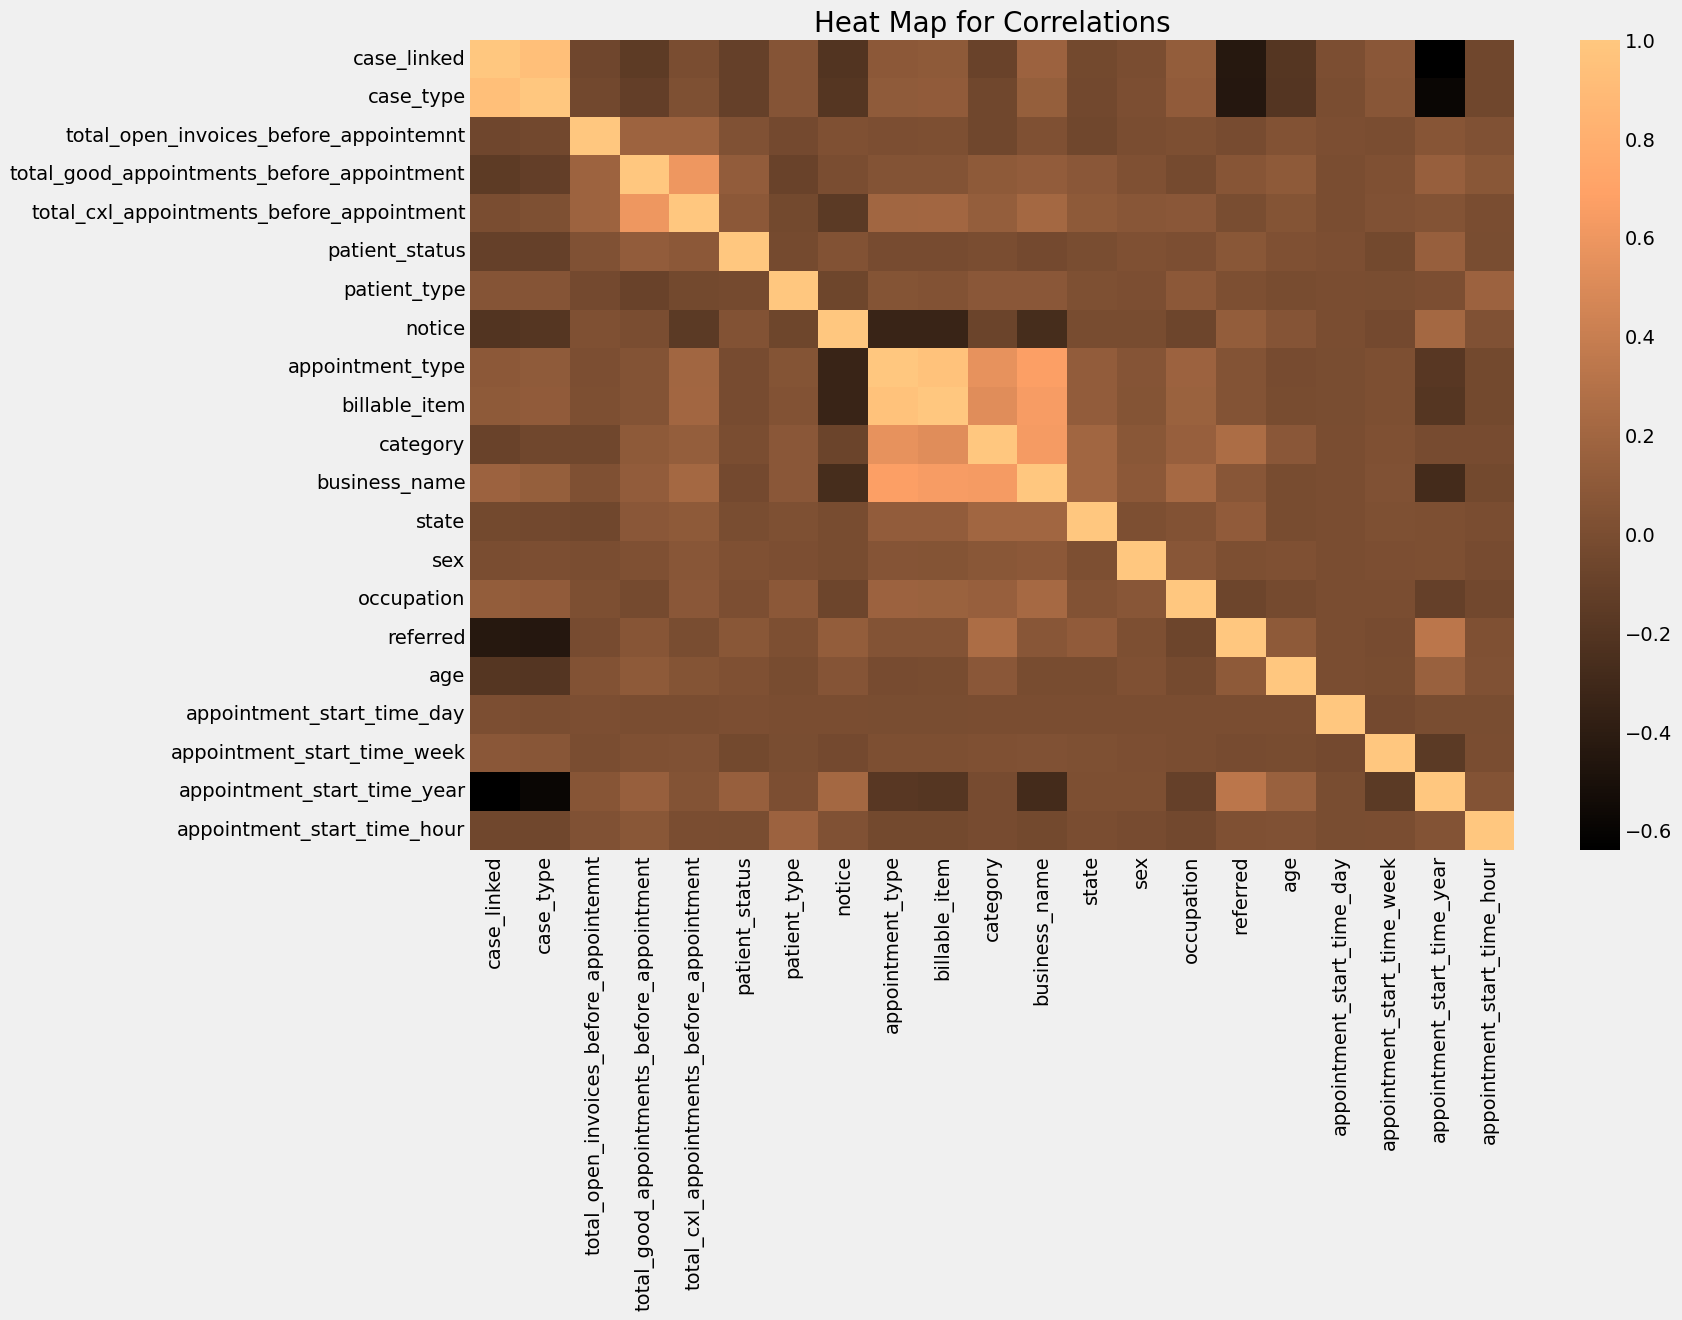

In [44]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

## Modelling

### Metrics for modelling
The most common metrics to use for imbalanced datasets are:

* F1 score
* Precision
* Recall
* AUC score (AUC ROC)
* Average precision score (AP)
* G-Mean

It is good practice to track multiple metrics when developing a machine learning model as each highlights different aspects of model performance.

#### Random Forest Classifier

In [67]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.


Training Accuracy:  1.0
Testing Accuarcy:  0.9998214413256196
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23466
           1       1.00      1.00      1.00      4536

    accuracy                           1.00     28002
   macro avg       1.00      1.00      1.00     28002
weighted avg       1.00      1.00      1.00     28002



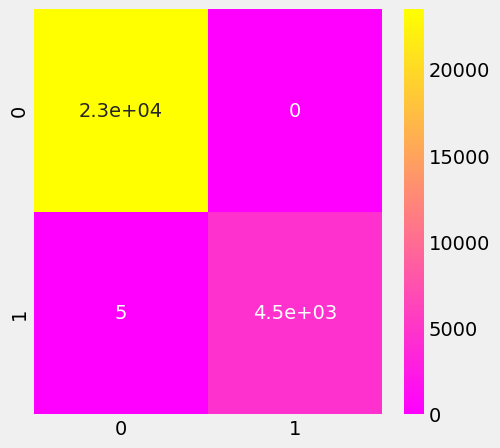

In [45]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

In [68]:
rfr = recall_score(y_test, y_pred_rf)
rfp = precision_score(y_test, y_pred_rf)
rff1 = f1_score(y_test, y_pred_rf)
rfaccuracy = accuracy_score(y_test, y_pred_rf)

ndf = [(rfr, rfp, rff1, rfaccuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'Class weights')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.998898,1.0,0.999449,0.999821


## Applying Sampling Techniques


Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.

### Under Sampling
Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

In [70]:
y.value_counts()

cancelled
0    117599
1     22411
Name: count, dtype: int64

In [71]:
cancelled = np.array(data[data['cancelled'] == 1].index)
no_cancelled = len(cancelled)

print(no_cancelled)

22411


In [72]:
normal_indices = data[data['cancelled'] == 0]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

117599


In [73]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_cancelled, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

22411


In [74]:
under_sample = np.concatenate([cancelled, random_normal_indices])
print(len(under_sample))

44822


In [75]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [76]:
# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'cancelled'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'cancelled']

print(x_u.shape)
print(y_u.shape)

(44822, 21)
(44822, 1)


In [77]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

(35857, 21)
(35857, 1)
(8965, 21)


In [78]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training Accuracy:  1.0
Testing Accuarcy:  0.999888455103179


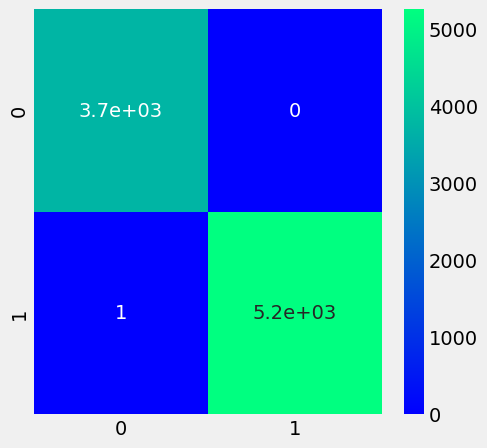

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3714
           1       1.00      1.00      1.00      5251

    accuracy                           1.00      8965
   macro avg       1.00      1.00      1.00      8965
weighted avg       1.00      1.00      1.00      8965



In [79]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred_1 = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred_1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred_1)
print(cr)

In [80]:
rfr_1 = recall_score(y_test1, y_pred_1)
rfp_1 = precision_score(y_test1, y_pred_1)
rff1_1 = f1_score(y_test1, y_pred_1)
rfaccuracy_1 = accuracy_score(y_test1, y_pred_1)

ndf = [(rfr_1, rfp_1, rff1_1, rfaccuracy_1)]

rf_score_1 = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score_1.insert(0, 'Random Forest with', 'Class weights')
rf_score_1

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.99981,1.0,0.999905,0.999888


### Over Sampling with SMOTE

SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [81]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(235198, 21)
(235198,)


In [82]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(188158, 21)
(188158,)
(47040, 21)
(47040,)


In [83]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  1.0
Testing Accuarcy:  0.9999787414965986


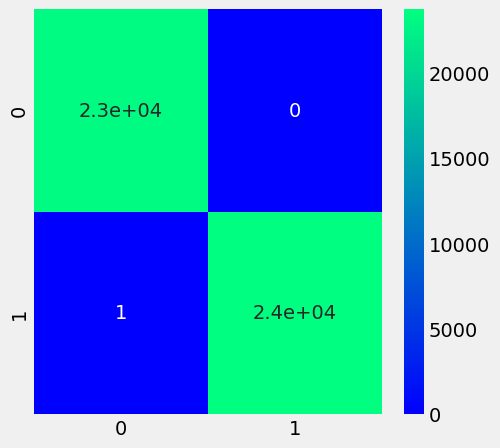

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23327
           1       1.00      1.00      1.00     23713

    accuracy                           1.00     47040
   macro avg       1.00      1.00      1.00     47040
weighted avg       1.00      1.00      1.00     47040



In [84]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

In [85]:
rfr_2 = recall_score(y_test2, y_pred)
rfp_2 = precision_score(y_test2, y_pred)
rff1_2 = f1_score(y_test2, y_pred)
rfaccuracy_2 = accuracy_score(y_test2, y_pred)

ndf = [(rfr_2, rfp_2, rff1_2, rfaccuracy_2)]

rf_score_2 = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score_2.insert(0, 'Random Forest with', 'Class weights')
rf_score_2

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.999958,1.0,0.999979,0.999979


## Model Explanation for Random Forest Classifier

In [60]:
# let's check the importance of each attributes

from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2436 ± 0.0014,notice
0.0075 ± 0.0009,total_cxl_appointments_before_appointment
0.0001 ± 0.0001,appointment_type
0.0000 ± 0.0001,category
0.0000 ± 0.0000,appointment_start_time_year
0.0000 ± 0.0000,business_name
0.0000 ± 0.0001,occupation
0.0000 ± 0.0000,case_type
0.0000 ± 0.0000,billable_item
0.0000 ± 0.0000,case_linked


In [61]:
! pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 34.1 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.

In [210]:
from pdpbox import pdp, info_plots #for partial plots

base_features = x_train.columns.values.tolist()

feat_name = 'notice'
pdp_dist = pdp.PDPIsolate(model=model, df=x_test, model_features = base_features, feature = feat_name, feature_name=feat_name)

#pdp.pdp_plot(pdp_dist, feat_name)
pdp_dist.plot()
plt.show()

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

### SHAP PLOT for vizualization/Model explainer
Shap plots the top most influential features for the sample under study. Features in red color influence positively, i.e. drag the prediction value closer to 1, features in blue color - the opposite.

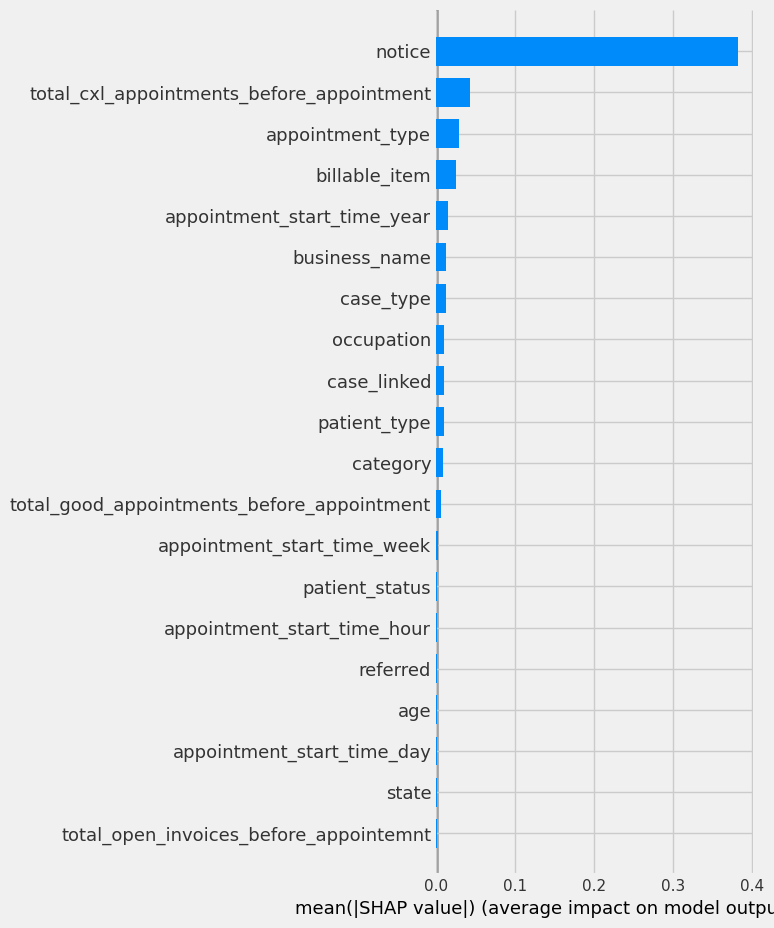

In [62]:
# let's see the shap values

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

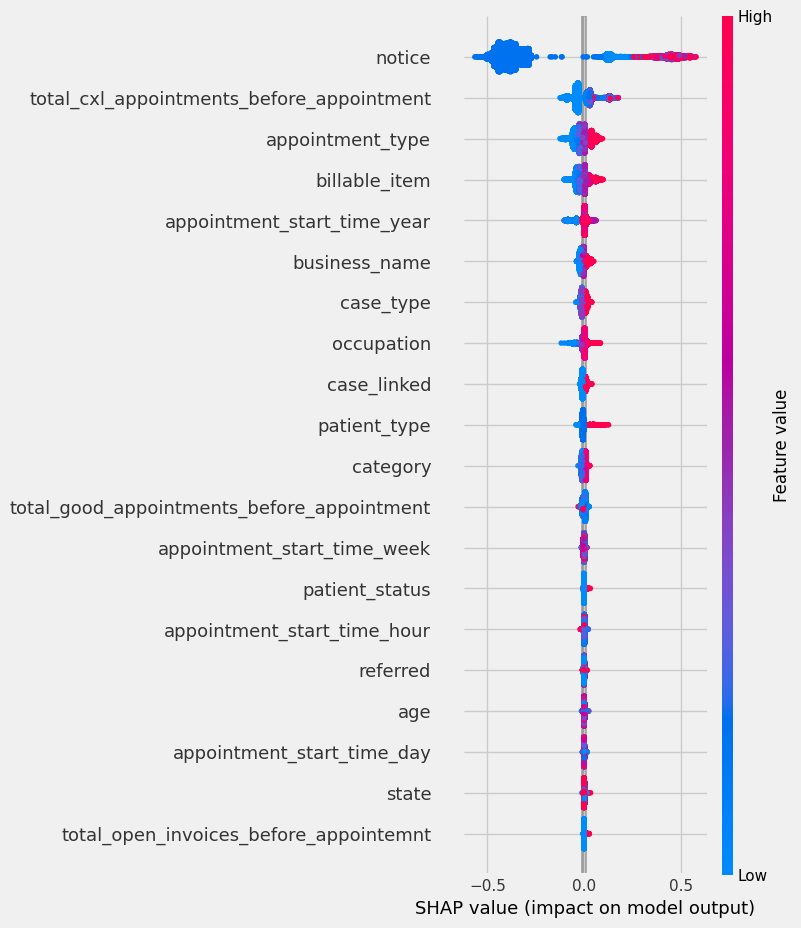

In [63]:
shap.summary_plot(shap_values[1], x_test)

In [64]:
# let's create a function to check the patient's conditions

def ac_analysis(model, cancel):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(cancel)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], cancel)

In [65]:
# let's do some real time prediction for patients

cancel = x_test.iloc[1,:].astype(float)
ac_analysis(model, cancel)

In [66]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])

In [86]:
pd.concat([rf_score, rf_score_1, rf_score_2])

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.998898,1.0,0.999449,0.999821
0,Class weights,0.999810,1.0,0.999905,0.999888
0,Class weights,0.999958,1.0,0.999979,0.999979


## Conclusion
* SMOTE Oversampling achived best Recall score.
* The reference model without Under/Oversampling achived 0.9989 Recall score.
* The model with Undersampling 0.9998